# Аналитика гипотез для увеличения выручки в интернет магазине

Необходимо проверить гипотезы, разработанные с отделом маркетинга для увеличения выручки.
 - приоритизировать гипотезы,
 - запустить A/B-тест,
 - проанализировать результаты.

## 1. Приоритезация гипотез

In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/hypothesis.csv')
display(data)
print(data.info())
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


In [3]:
#проведем приоритезацию гипотез методом "ICE"
data['ICE'] = ((data['Impact'] * data['Efforts']) / data['Confidence']).round(1)
display(data.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,12.5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,8.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,7.5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,5.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,4.4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,3.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,1.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


In [4]:
#проведем приоритезацию гипотез методом "RICE"
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
display(data.sort_values(by='RICE', ascending=False))


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,4.4,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,1.3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,7.5,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,1.1,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,5.0,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,8.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,12.5,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,3.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


При приоритезации гипотез методом "ICE" не затронут важный показатель: охват пользоваелей (Reach). Именно засчет него приоретизация гипотез изменилась при расчете методом "RICE". При использовании метода "ICE" приоритетной гипотезой оказалась гипотеза №1, с максимально высокой сложностью проверки, низким охватом пользователей и среднем влиянии на них. При перерасчете приоритезации гипотез методом "RICE", на первом месте стала гипотеза №7 с максимальным охватом пользователей, а также высокой силой влияния на пользователей, высокой уверенностью в оценке параметров и средней сложностью проверки. Таким образом, второй метод считаю более подходящим для выбора приоритеных гипотез.

## 2. Предобработка данных

In [5]:
#изучим общую иныормацию о данных
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
print(orders.info())
print(visitors.info())
display(orders.head(5))
display(visitors.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
#переведем столбцы с датой и временем в формат datetime64
def convert_to_datetime (df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
convert_to_datetime(orders, 'date')
convert_to_datetime(visitors, 'date')
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [7]:
#проверим данные на наличие дубликатов
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


В представленных данных отсутсвуют пропущенные значения, нет дубликатов. Столбцы с данными о дате переведены в формат datetime. Остальные данные представлены в нужном формате.

## 3. Анализ кумулятивных метрик

In [8]:
# создаем массив уникальных пар значений дат и групп теста
dategroups = orders[['date','group']].drop_duplicates()

# получаем кумулятивные данные о заказах по дням
ordersAggregated = dategroups.apply(lambda x: 
                                    orders[np.logical_and(orders['date'] <= x['date'], 
                                                          orders['group'] == x['group'])]
                                    .agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем кумулятивные данные о посетителях интернет-магазина по дням  
visitorsAggregated = dategroups.apply(lambda x: 
                                      visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                              visitors['group'] == x['group'])]
                                      .agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


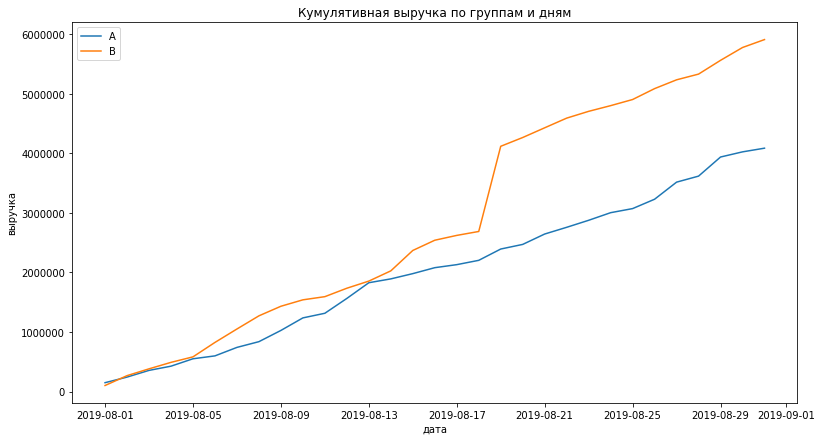

In [9]:
# создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(13, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title("Кумулятивная выручка по группам и дням")
plt.xlabel("дата")
plt.ylabel("выручка")
pd.plotting.register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore") 

Выручка растет втечение всего теста, при этом выручка группы В с середины теста резко увеличилась и продолжает расти. Резкий скачок в группе В может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов. 

Text(0, 0.5, 'средний чек')

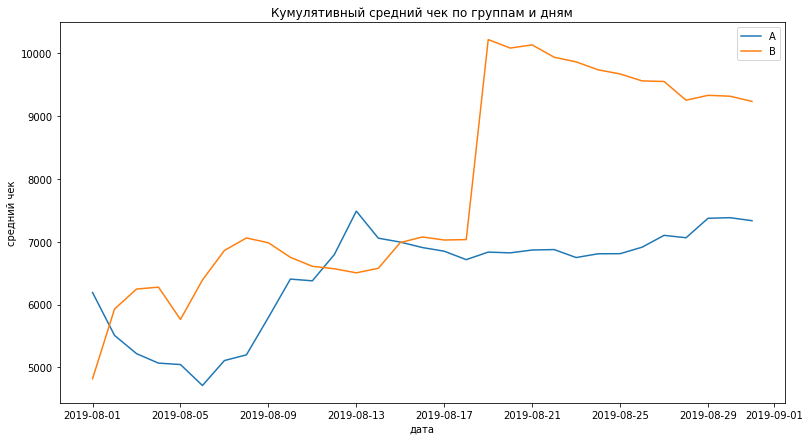

In [10]:
#построим график кумулятивного среднего чека по группам
plt.figure(figsize=(13, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title("Кумулятивный средний чек по группам и дням")
plt.xlabel("дата")
plt.ylabel("средний чек")

Из графика видно, что средний чек до середины тестирования колебался, а затем в группе В произошел резкий скачок, после которого средний чек начал постепенно снижаться. Скорее всего такой скачок объясняется "дорогими" заказами. 

Text(0, 0.5, 'средний чек')

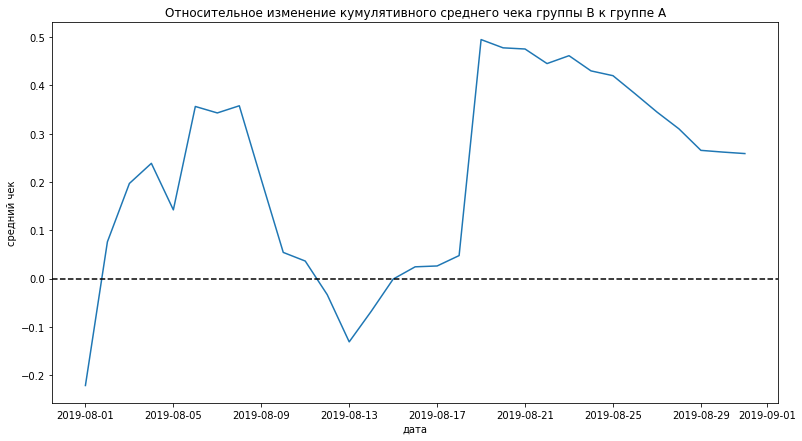

In [11]:
# изучим относительное различие среднего чека
CumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                             left_on='date', 
                                             right_on='date', 
                                             how='left', 
                                             suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(13, 7))
plt.plot(CumulativeRevenue['date'], 
         (CumulativeRevenue['revenueB']/CumulativeRevenue['ordersB'])/
         (CumulativeRevenue['revenueA']/CumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего чека группы В к группе А")
plt.xlabel("дата")
plt.ylabel("средний чек")

В нескольких точках график различия между группами сильно скачет, вероятней всего из-за крупных (дорогих) заказов.

['2019-08-01', '2019-09-01', 0.025, 0.04]

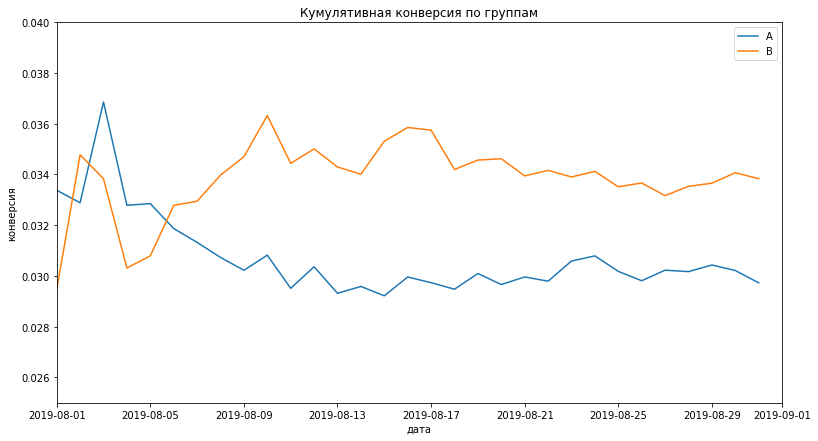

In [12]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(13, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("Кумулятивная конверсия по группам")
plt.xlabel("дата")
plt.ylabel("конверсия")
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.040])

В начале исследования значение конверсии групп колебалось, но затем конверсия группы В выросла и зафиксировалась, а конверсия группы А просела в начале теста и также зафиксировалась.

['2019-08-01', '2019-09-01', -0.5, 0.5]

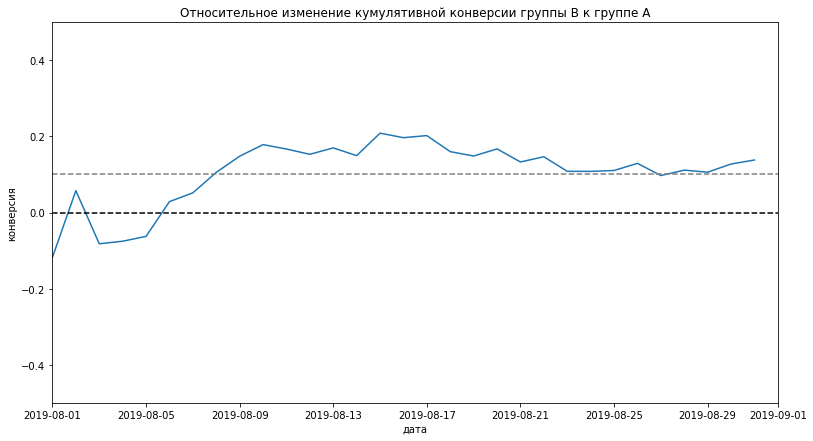

In [13]:
#построим график относительного различия кумулятивных конверсий
CumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                     left_on='date', 
                                                                     right_on='date', 
                                                                     how='left', 
                                                                     suffixes=['A', 'B'])
plt.figure(figsize=(13, 7))
plt.plot(CumulativeConversions['date'], CumulativeConversions['conversionB']/CumulativeConversions['conversionA']-1)
plt.title("Относительное изменение кумулятивной конверсии группы В к группе А")
plt.xlabel("дата")
plt.ylabel("конверсия")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

В начале теста конверсия группы B была ниже конверсии групп А, затем конверсия группы В резко выросла. Далее конверсия группы В немного снизилась и установилась примерно на одном уровне.

Из анализа видно, что выручка группы В растет, средний чек также растет, конверсия тоже выросла. Однако, при анализе выручки и среднего чека на графике видны резке скачки, что говорит о наличии выбросов в данных. Для дальнейшего анализа необходимо будет очистить данные от выбросов.

## 4. Анализ выбросов и всплесков

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


[2. 4.]


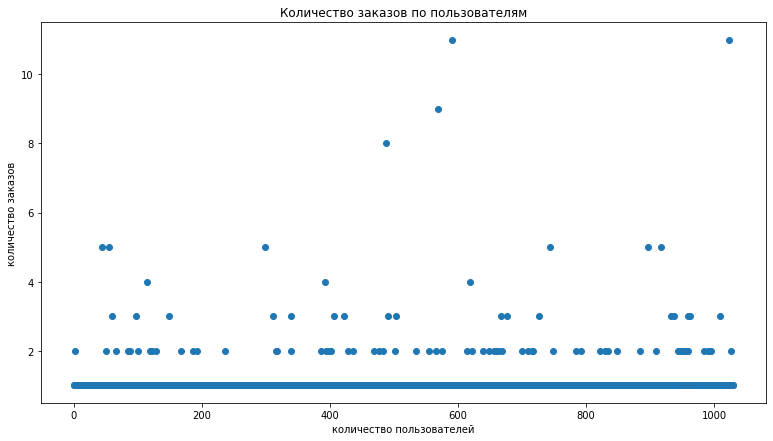

In [14]:
#рассчитаем количество заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

display(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(13, 7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Количество заказов по пользователям")
plt.xlabel("количество пользователей")
plt.ylabel("количество заказов")

#посчитаем 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

Не более 5% пользователей оформляли больше чем 2 заказа и 1% пользователей заказывали более 4-х раз (что также хорошо видно на графике). Выберем границу в размере 2-х заказов на одного пользователя для дальнейшего анализа. 

,visitorId,revenue
463,1920142716,1294500
503,2108080724,202740
1023,4256040402,176490
1026,4266935830,157980
569,2378935119,142939
316,1316129916,94770
314,1307669133,92550
213,888512513,86620
744,3062433592,75459
186,759473111,72000


[32899.5 67750. ]


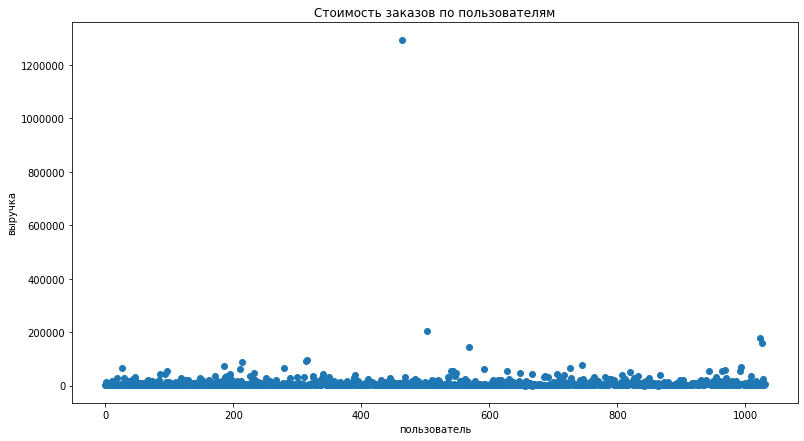

In [15]:
#рассчитаем выручку от заказов по пользователям
revenueByUsers = orders.drop(['group', 'date'], axis=1).groupby(
    'visitorId', as_index=False).agg({'revenue' : 'sum'})

revenueByUsers.columns = ['visitorId','revenue']

display(revenueByUsers.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(revenueByUsers)))
plt.figure(figsize=(13, 7))
plt.scatter(x_values, revenueByUsers['revenue'])
plt.title("Стоимость заказов по пользователям")
plt.xlabel("пользователь")
plt.ylabel("выручка")

#посчитаем 95-й и 99-й перцентили стоимости заказов
print(np.percentile(revenueByUsers['revenue'], [95, 99]))

Не более 5% заказов дороже 32 899.5 рублей и не более 1% дороже 67 750 рублей. На графике указаны единичные точки очень дорогих заказов, то есть выбросов. Таким образом, выберем границу выручки для отсеивания дорогих заказов в размере 70 000 рублей (67 750 округлим до 70 000) и отсеим не более 1% заказов. 

Для дальнейшего анализа необходимо будет очистить данные от выбросов, а именно ограничить количество заказов по пользователям (не более двух) и выручку (не более 70 000 рублей), так мы уберем не более 5% и 1% покупателей соотвественно

## 5. Анализ А/В теста

In [16]:
#сгруппируем данные по посетителям по дням и куммулятивные
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: 
                                            visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: 
                                            visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#сгруппируем данные по заказам по дням и куммулятивные
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: 
                                        ordersADaily[ordersADaily['date'] <= x['date']]
                                        .agg({'date' : 'max',
                                              'ordersPerDateA' : 'sum',
                                              'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: 
                                        ordersBDaily[ordersBDaily['date'] <= x['date']]
                                        .agg({'date' : 'max',
                                              'ordersPerDateB' : 'sum',
                                              'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#соедним все в один датафрейм
new_data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(new_data.head(10))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


In [17]:
#посчитаем число совершенных заказов в группе А и группе В
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

#создадим переменные, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(new_data['visitorsPerDateA']
                                                  .sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(new_data['visitorsPerDateB']
                                                  .sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)
#рассчитаем p-value для конверсии
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#относительный прирост конверсии группы В
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.00840
0.138


По «сырым» данным прирост конверсии в группе В составил 13,8%. P-value = 0.00840 меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, необходимо отвергнуть. 

In [18]:
#рассчитаем p-value для среднего чека
print("{0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
#относительные различия в среднем чеке между группами
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.36465
0.259


P-value значительно больше 0.05. Значит, не можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия. Однако, относительное различие показывает, что средний чек в группе В выше среднего чека группы А на 25,9%. Очень большая разница. Необходимо провести анализ данных без аномальных выбросов. Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 70 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и не более 1% пользователей с дорогими заказами. 

In [19]:
#выделим аномальных пользователей
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 70000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))

#очистим данные от аномалий
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(new_data['visitorsPerDateA']
                                                          .sum() - len(ordersByUsersA['orders'])), 
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(new_data['visitorsPerDateB']
                                                          .sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)
#рассчитаем p-value для конверсии
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#относительный прирост конверсии группы В по очиенным данным
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitorId, dtype: int64

0.00666
0.167


По «очищенным» данным прирост конверсии в группе В составил 16,7%. P-value = 0.00666 меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, необходимо отвергнуть. Различия конверсий по "сырым" и "очищенным" данным небольшое (3%). 

In [20]:
#рассчитаем p-value для среднего чека по очищенным данным
print("{0:.5f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

#относительные различия в среднем чеке между группами по очищенным данным
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.33197
-0.073


P-value значительно больше 0.05. Значит, не можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия. По очищенным данным, относительное различие показывает, что средний чек в группе В ниже среднего чека группы А на 7,3%. 

ВЫВОД

1. Наиболее приоритетными гипотезами для проверки стали гипотеза №7 и №2. Данные гипотезы имеют достаточно высокие оценки по охвату пользователей и невысокие оценки по сложности проверки.  
2. Что касается А/В тестирования, были выявлены следующие факты:
    - есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий (конверсия группы В выше конверсии группы А на 13,8%);
    - по сырым данным есть статистически значимое различия по среднему чеку между группами. Однако после очистки данных от выбросов статистически значимого различия нет;
    - график различия конверсии между группами сообщает, что результаты группы B лучше результатов группы A и зафиксировались около среднего значения;
    - график различия среднего чека говорит о том, что результаты группы B колеблются (имеют резкие скачки как вверх, так и вниз), сделать определенные выводы по данному графику нельзя. 

Исходя из обнаруженных фактов, тест следует остановить и признать успешным (зафиксировать победу группы В). Можно перейти к проверке следующей гипотезы. 
